In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/lsp/.virtualenvs/kaggle/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# Plot parameters
sns.set()
# Seven hls color palette
current_palette_7 = sns.color_palette("hls", 7)
sns.set_palette(current_palette_7)

%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
# rcParams.keys()

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

# 2.7 Eigendecomposition

In [5]:
A = np.array([[0.8, 0.3], [0.2, 0.7]])
print 'A', A
print np.dot(np.linalg.eig(A)[0][0], np.linalg.eig(A)[1][0])
print np.dot(A, np.linalg.eig(A)[1][0])

A [[ 0.8  0.3]
 [ 0.2  0.7]]
[ 0.83205029 -0.70710678]
[ 0.4535082  -0.32856469]


In [19]:
A = np.array([[2, 3], [5, 7]])
x = np.array([3, 5])
x = x.reshape((x.shape[0], 1))
print 'A:\n', A
print '\nx:\n', x
print 'Ax = ', np.dot(A,x)

A:
[[2 3]
 [5 7]]

x:
[[3]
 [5]]
Ax =  [[21]
 [50]]


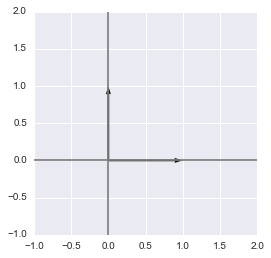

In [38]:
def plotVectors(vecs):
    x = vecs[0]
    y = vecs[1]
    
    plt.figure()

    plt.quiver([x[0], y[0]],
               [x[1], y[1]],
               [x[2], y[2]],
               [x[3], y[3]],
               angles='xy', scale_units='xy', scale=1)

    plt.xlim(-1, 2)
    plt.ylim(-1, 2)
    plt.axvline(x=0, color='grey')
    plt.axhline(y=0, color='grey')

#     plt.text(1, 1.5, r'$\vec{u}$', size=18)
#     plt.text(1.5, -1, r'$\vec{v}$', size=18)

    plt.show()
    plt.close()

x = [0,0,0,1]
y = [0,0,1,0]
plotVectors([x,y])

# Eigenvectors and eigenvalues

Let's say that **A** is a matrix. This matrix **A** can *act* on a vector **x** and output another vector **AX**. Like a function in a mutlidimensional space, it will input the vector **x** and output the vector **Ax**.

The eigenvectors of a matrix are the output vectors that are in the same direction than the input vectors. **x** is a eigenvector of **A** if **x** and **Ax** are in the same direction that is the vectors **Ax** and **x** are parallel. This means that the output vector is just the scaled input vector. This scalling factor is $\lambda$ and is called the **eigenvalue** of A.

$$
\boldsymbol{Ax} = \lambda\boldsymbol{x}
$$